# Author: Anand K

## SPARK FOUDATION - TASK 1

## Prediction using Supervised ML

### Predict the percentage of an student based on the no. of study hours

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the dataset url

In [2]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
print("(rows, columns):",data.shape)

(rows, columns): (25, 2)


In [5]:
print("Duplicated values:",data.duplicated().sum())

Duplicated values: 0


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


### Plotting the data

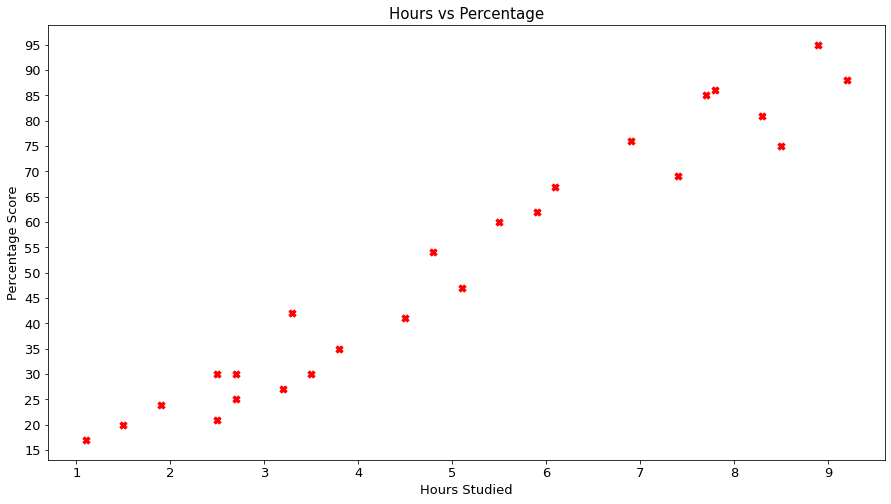

In [8]:
hours = data['Hours'].tolist()
per = data['Scores'].tolist()
plt.figure(figsize = (15,8))
plt.scatter(hours,per,marker = 'X', color = 'red',s = 50, cmap = 'coolwarm')
plt.title('Hours vs Percentage',fontsize = 15)
plt.xlabel('Hours Studied',fontsize = 13)  
plt.ylabel('Percentage Score',fontsize = 13)
plt.xticks(list(range(1,10,1)),fontsize = 13)
plt.yticks(list(range(15,100,5)),fontsize = 13)
plt.show()

### Spliting the data

In [9]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)

### Training the algorithm

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
y_pred = regressor.predict(x_test)

### Visualization

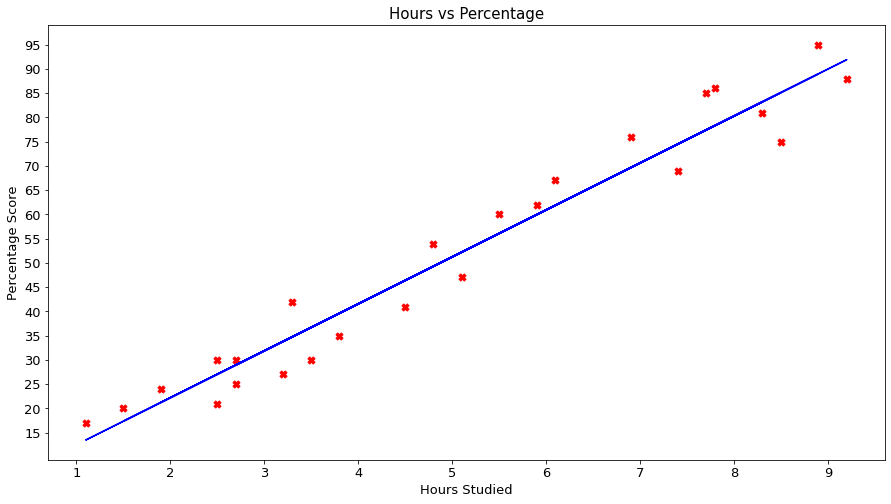

In [12]:
plt.figure(figsize = (15,8))
plt.scatter(x,y,marker = 'X', color = 'red',s = 50)
plt.plot(x,regressor.predict(x),color='blue')
plt.title('Hours vs Percentage',fontsize = 15)
plt.xlabel('Hours Studied',fontsize = 13)  
plt.ylabel('Percentage Score',fontsize = 13)
plt.xticks(list(range(1,10,1)),fontsize = 13)
plt.yticks(list(range(15,100,5)),fontsize = 13)
plt.show()

### Predictions

In [13]:
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [14]:
pred_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred_data

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [15]:
regressor.predict([[5.1]])

array([52.20549094])

### Error rate and Accuracy

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):',np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
r2 = (metrics.r2_score(y_test, y_pred))*100
print('R-Squared (Accuracy):',"{:.2f}".format(r2))

Mean Absolute Error: 3.9207511902099244
Root Mean Squared Error (RMSE): 1.9800886824104431
R-Squared (Accuracy): 96.78
